In [1]:
pip install statsmodels


In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 散点矩阵图
df = pd.read_csv('最终组合数据.csv')
sns.pairplot(df)
plt.show()

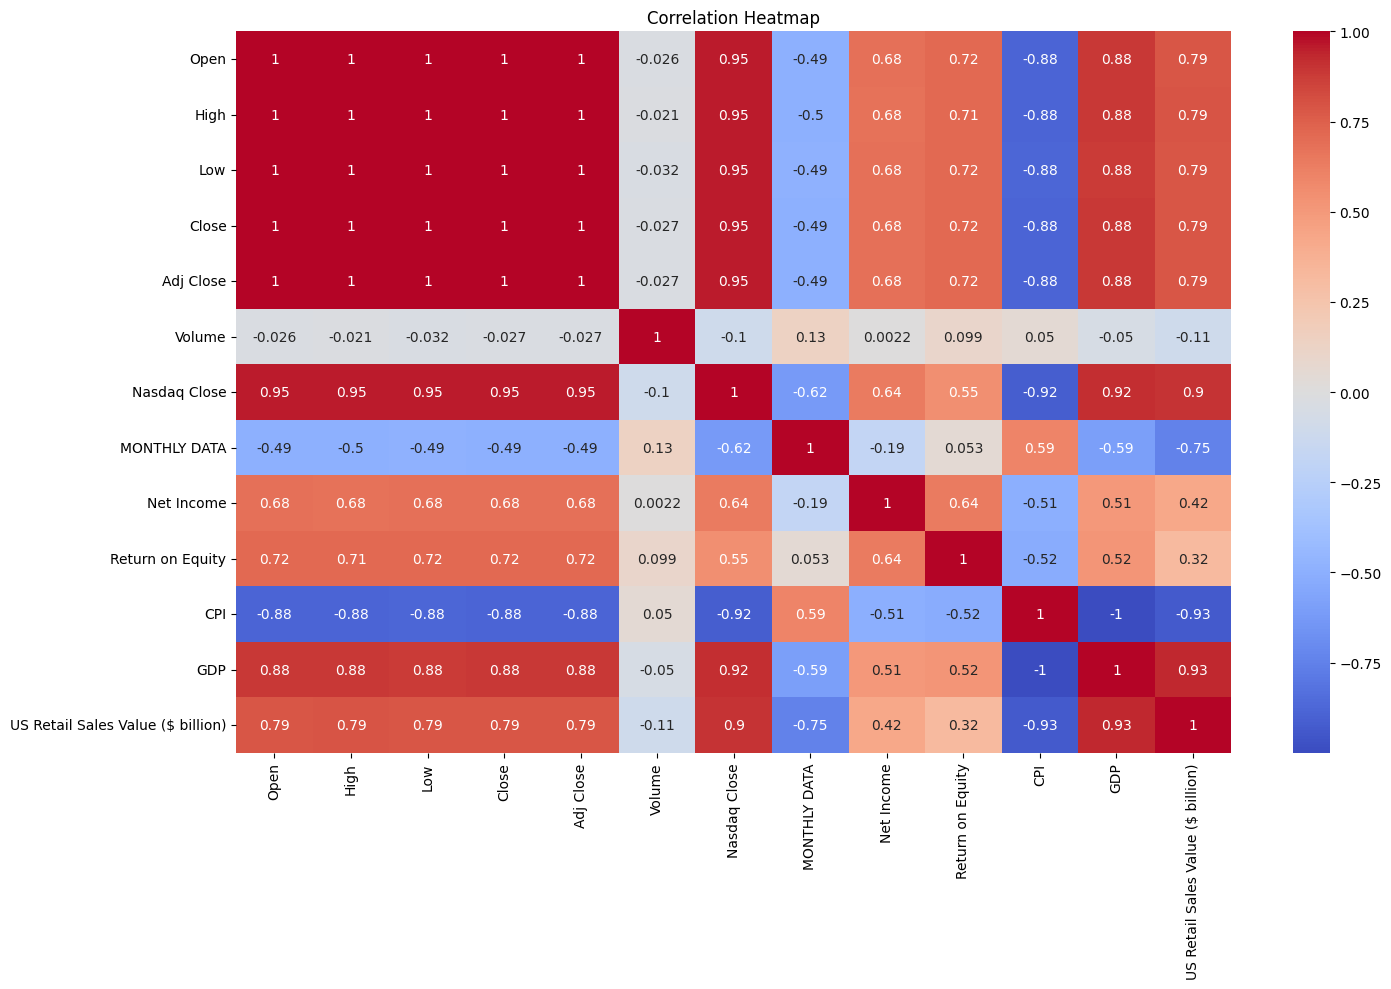

In [3]:
# 相关矩阵和热图


correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

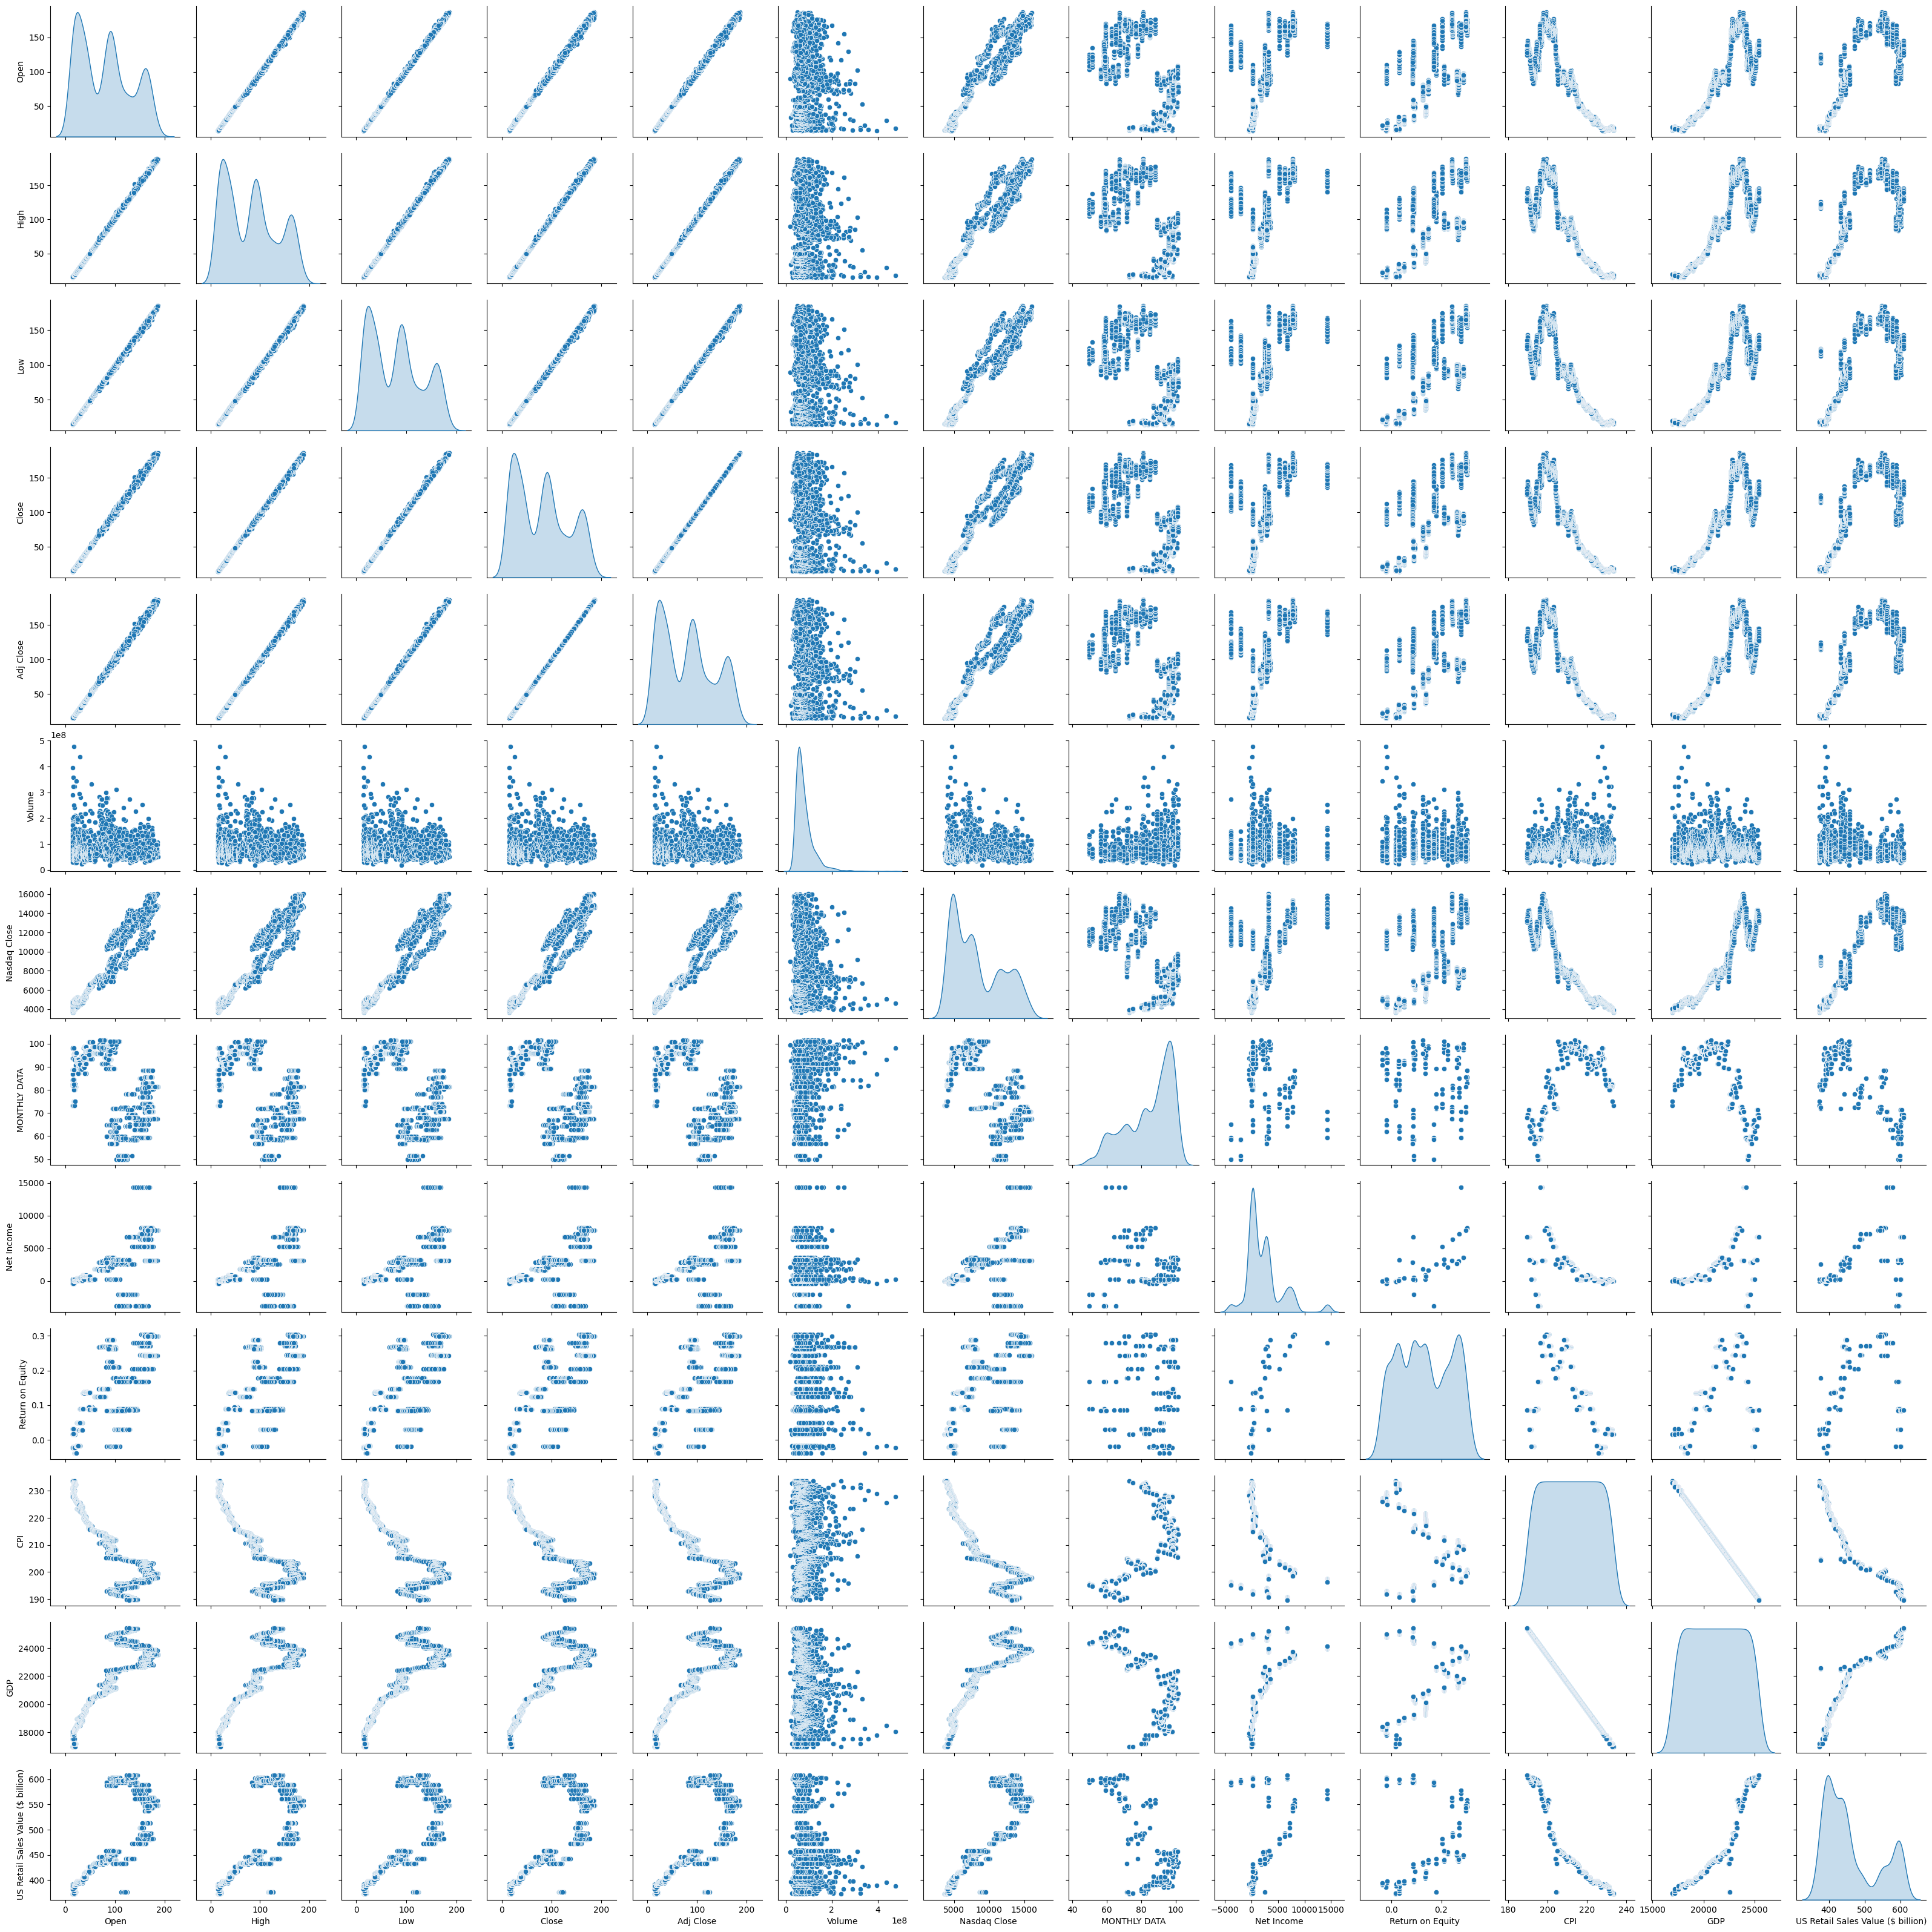

In [4]:
# 对角线图
sns.pairplot(df, diag_kind="kde")
plt.show()

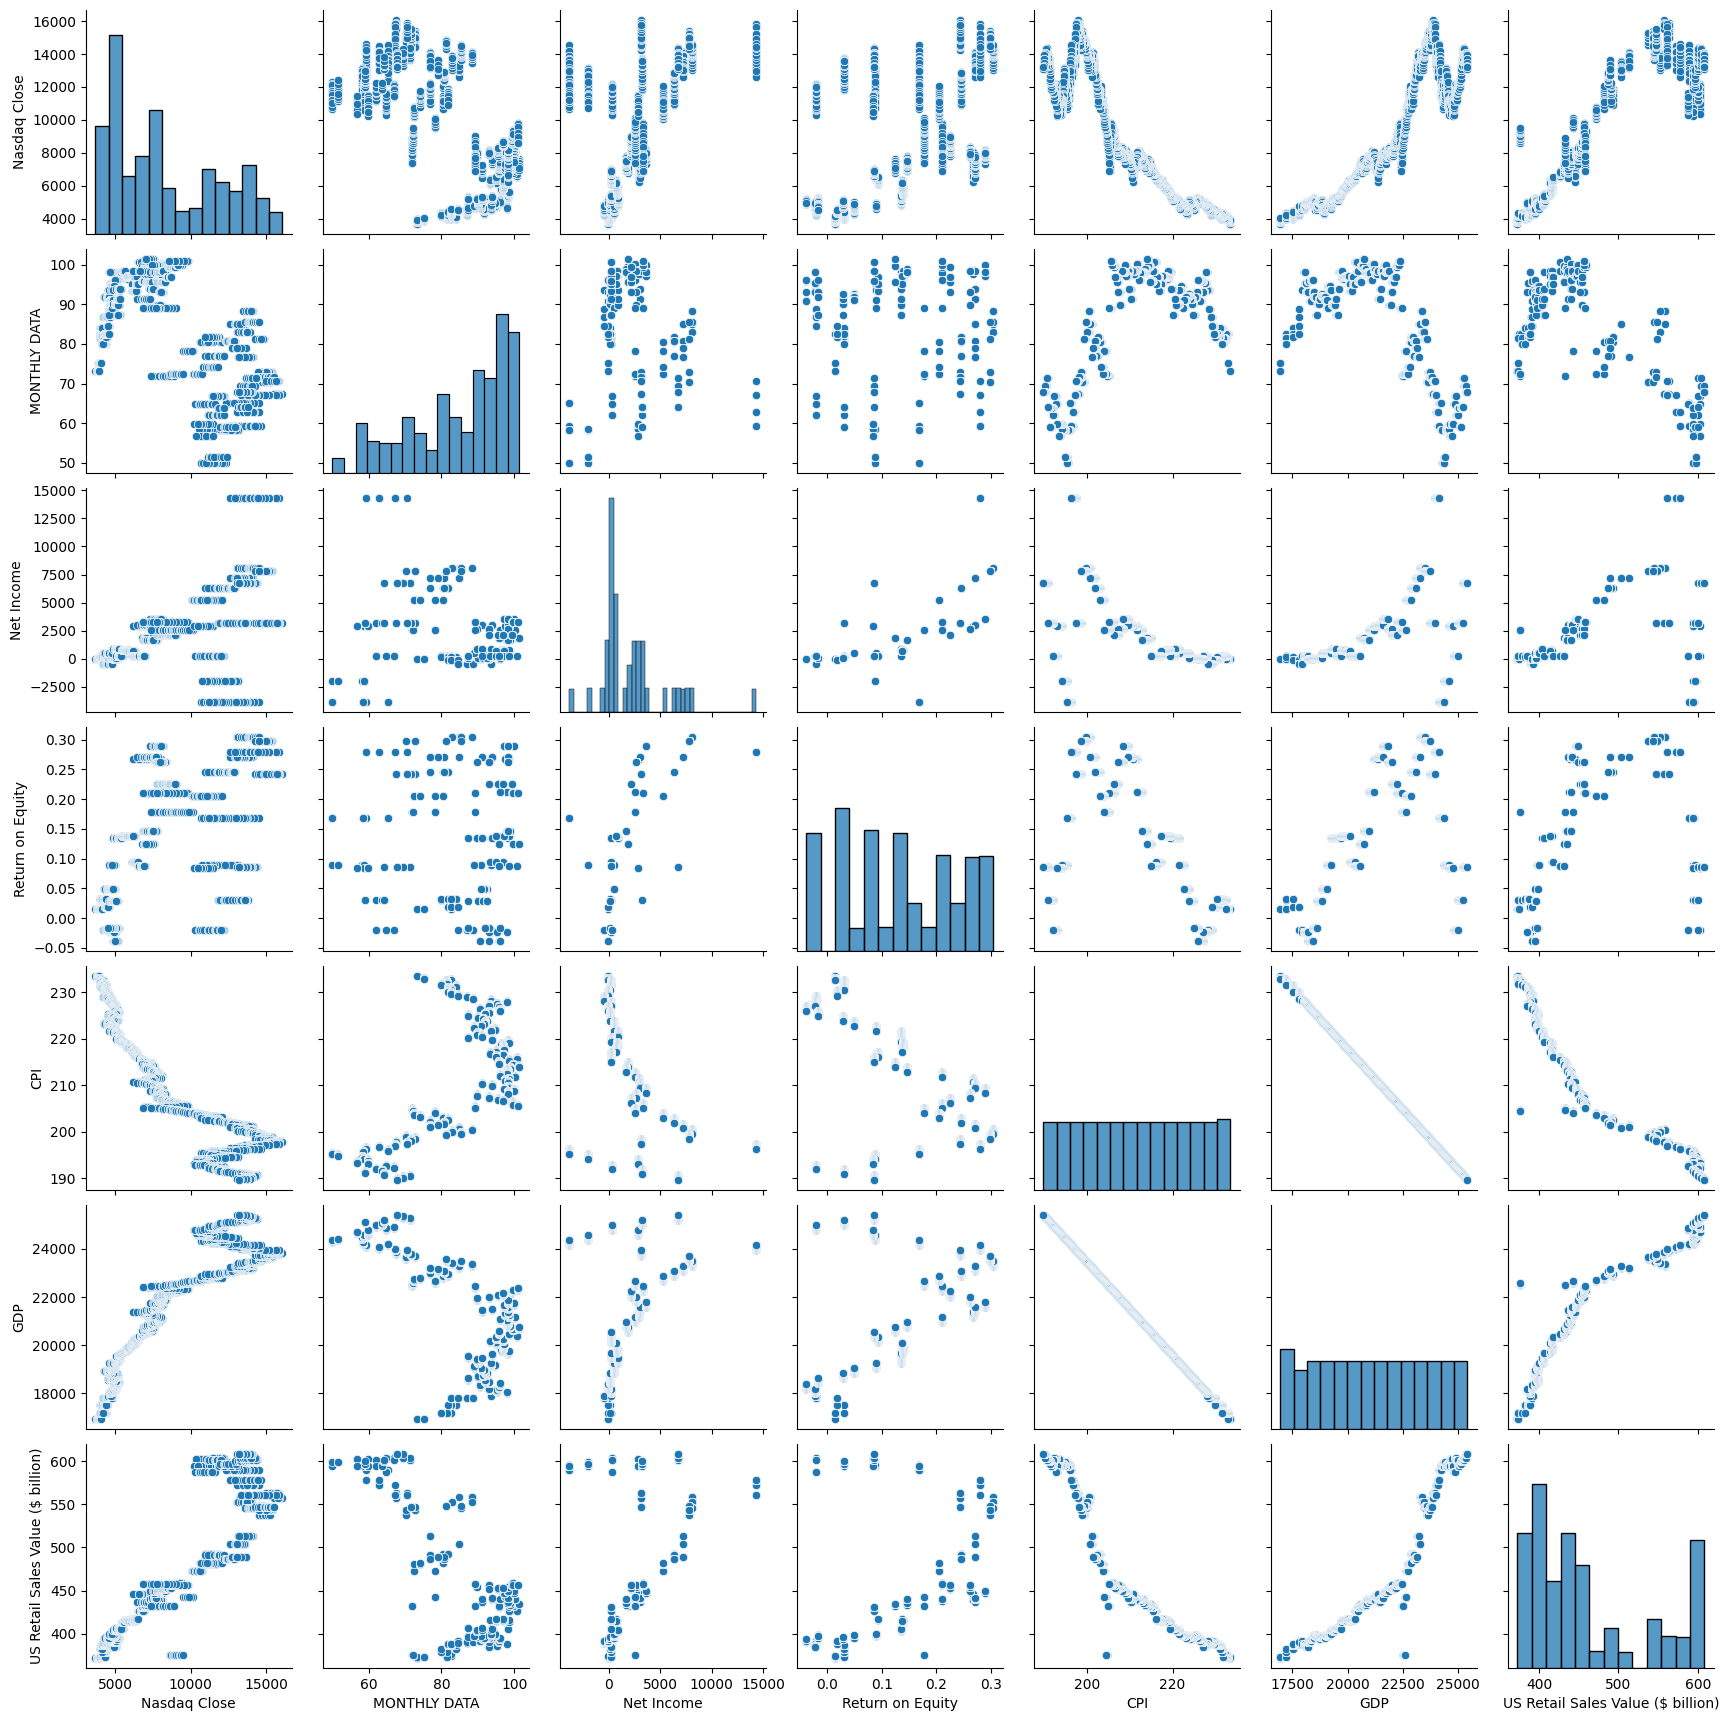

In [5]:
#成对关系图
sns.pairplot(df, vars=['Nasdaq Close','MONTHLY DATA','Net Income','Return on Equity','CPI', 'GDP', 'US Retail Sales Value ($ billion)'])
plt.show()

In [6]:
#多变量回归分析


X = df[['Nasdaq Close','MONTHLY DATA','Net Income','Return on Equity','CPI', 'GDP', 'US Retail Sales Value ($ billion)']]
y = df['Close']
X = sm.add_constant(X)  # 添加常数项
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.305e+04
Date:                Mon, 12 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:38:11   Log-Likelihood:                -8939.4
No. Observations:                2517   AIC:                         1.789e+04
Df Residuals:                    2509   BIC:                         1.794e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Explained Variance Ratio: [6.95781536e-01 1.90233529e-01 6.59289312e-02 3.17923166e-02
 1.03331047e-02 5.92094213e-03 9.64066519e-06]


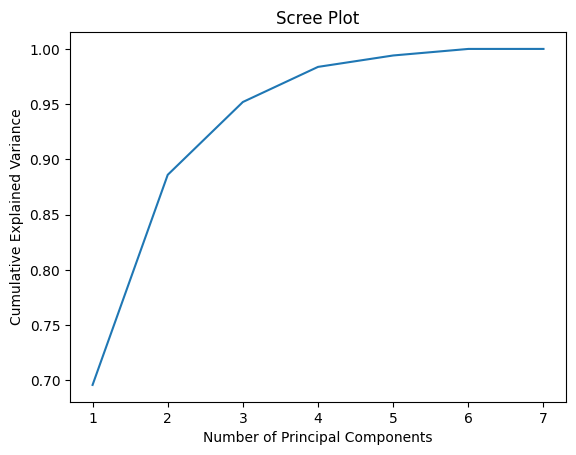

In [7]:
# 主成分分析（PCA）

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 假设数据集为df，包含多个宏观指标变量
X = df[['Nasdaq Close','MONTHLY DATA','Net Income','Return on Equity','CPI', 'GDP', 'US Retail Sales Value ($ billion)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 解释方差比例
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# 绘制累计解释方差比例
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


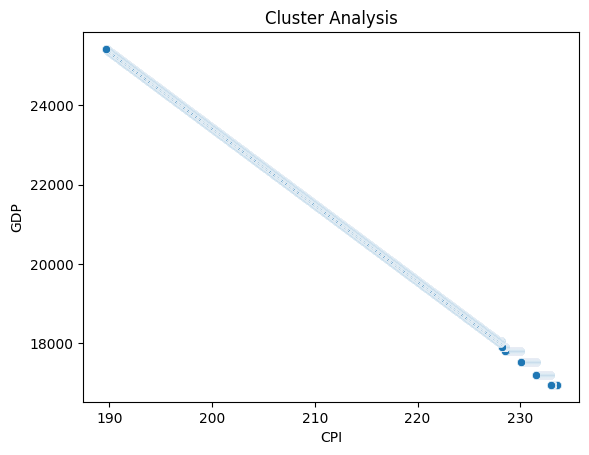

In [8]:
# 簇分析（K均值聚类）
from sklearn.cluster import KMeans

# 假设数据集为df，包含多个宏观指标变量
X = df[['Nasdaq Close','MONTHLY DATA','Net Income','Return on Equity','CPI', 'GDP', 'US Retail Sales Value ($ billion)']]  # 替换为实际的宏观指标变量名

# 使用K均值聚类算法
kmeans = KMeans(n_clusters=6)  # 设置聚类簇的数量
kmeans.fit(X)
labels = kmeans.labels_

# 绘制簇分布图
sns.scatterplot(x='CPI', y='GDP', data=df)
plt.xlabel('CPI')
plt.ylabel('GDP')
plt.title('Cluster Analysis')
plt.show()

散点矩阵图：绘制多个宏观指标之间两两的散点图，以观察它们之间的关系。通过散点矩阵图可以同时可视化多个变量之间的相互作用。

相关矩阵和热图：计算宏观指标之间的相关系数矩阵，并使用热图可视化它们之间的相关性。这可以帮助您了解宏观指标之间的线性关系，并发现潜在的关联模式。

对角线图：绘制每个宏观指标的直方图或密度图，并在对角线上显示每个变量的核密度估计图。这可以帮助您了解每个宏观指标的分布情况以及它们之间的差异。

成对关系图：绘制每个宏观指标与其他宏观指标之间的关系图。这可以帮助您观察每个宏观指标与其他指标之间的趋势和模式。

多变量回归分析：使用多变量回归模型来探索宏观指标之间的复杂关系。通过拟合回归模型，可以确定每个宏观指标对目标变量的影响，并进行预测和解释。

主成分分析（PCA）：应用PCA来降低维度并提取数据集中的主要变量。这可以帮助您发现哪些宏观指标对数据集的变异性贡献最大。

簇分析：使用聚类算法（如K均值聚类）将宏观指标分为不同的群组，以发现数据集中的潜在模式和相似性。